# Exercise 3

*Objectives*: Wrangle a data set using two new tools, [Trifacta Wrangler](https://www.trifacta.com/start-wrangling/) and [Apache Spark](https://spark.apache.org/).  Results should include a cleaned-up data set and summary statistics.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with clear responses, with shell commands and markdown cells explaining your work as appropriate in the cells provided (as more as needed).  The notebook itself should be completely reproducible (using AWS an EC2 instance based on the class AMI) from start to finish; another person should be able to use the code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not fill in the text/markdown cells provided explaining your thinking where required.

*Attestation*: **Work individually**.  At the end of your submitted notebook, state that you did all of the substantial work on this assignment yourself, and acknowledge any assistance you received.

*Deadline*: Monday, November 5, 1pm.  Zip your notebook and wrangled dataset and submit it to Blackboard as a single zip (`.zip`) file.

## Part 1 - Wrangle a dataset with Trifacta

For this part, select a CSV dataset from the [OKFN US City Open Data Census](http://us-cities.survey.okfn.org/).  Choose one according to your interest, but try to choose one that's "green" and has somewhere between 10,000 and 1,000,000 rows.  Try also to choose a dataset that is less than 50MB (to save us some time and space during grading!).

Document your process by answering each of the following questions.

### Q1.1 - Choose your dataset

Which dataset did you choose?  What is it called, and what is it about?  Provide a link to its main web page (not its data link, which you'll include next).

**Answer**

The data I chose is from city of Chicago Open data website called __'Current Employee Names, Salaries, and Position Titles'__ . The dataset was updated on January 30, 2018 and provided by Chicago government lists all current City of Chicago employees, complete with full names, departments, positions, employment status (part-time or full-time), frequency of hourly employee –where applicable—and annual salaries or hourly rate. It containis 8 columns and 33.2k rows. T
_Link of the main web page: https://data.cityofchicago.org/Administration-Finance/Current-Employee-Names-Salaries-and-Position-Title/xzkq-xp2w_

### Q1.2 - Get your data

If possibly, use `wget` to download your data onto your instance. **If you cannot**, make sure that link you provided works, note that it will need to be uploaded manually, and upload it manually so you can inspect it in the next sections.

**Answer**

I uploaded the original dataset, a screenshot of my Trifacta recipe and the wrangled dataset to s3. But I am not absolutely sure it will successed by using _!wget_. If it fails , because upload the files in the folder.

In [1]:
!wget https://s3.amazonaws.com/chicagosalary/Current_Employee_Names__Salaries__and_Position_Titles.csv

--2018-11-05 14:28:50--  https://s3.amazonaws.com/chicagosalary/Current_Employee_Names__Salaries__and_Position_Titles.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.40.122
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.40.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2276277 (2.2M) [text/csv]
Saving to: ‘Current_Employee_Names__Salaries__and_Position_Titles.csv’

Current_Employee_Na 100%[===================>]   2.17M  --.-KB/s    in 0.05s   

2018-11-05 14:28:50 (41.0 MB/s) - ‘Current_Employee_Names__Salaries__and_Position_Titles.csv’ saved [2276277/2276277]



### Q1.3 - Explore your data

Use command line tools of your choice (CSVKit, XSV, or other UNIX commands we've seen in class already) to explore your data.  How long is it?  Does it seem relatively clean? Do you see data issues that need wrangling?

**Answer**

Firsly, get an overview of the rows and columns in the dataset.     
Like the descroption above, the dataset contains 12333 rows and 10 columns.

In [2]:
!mv Current_Employee_Names__Salaries__and_Position_Titles.csv Salary.csv

In [3]:
!wc -l Salary.csv

33184 Salary.csv


In [4]:
!csvcut -n Salary.csv

  1: Name
  2: Job Titles
  3: Department
  4: Full or Part-Time
  5: Salary or Hourly
  6: Typical Hours
  7: Annual Salary
  8: Hourly Rate


Then, take a look at a sample of the data to determine its attributes's domains and ranges.

In [5]:
!head -n 1000 Salary.csv | csvstat

  1. "Name"

	Type of data:          Text
	Contains null values:  False
	Unique values:         995
	Longest value:         30 characters
	Most common values:    ADE,  JAMES P (2x)
	                       ANDERSON,  DAVID C (2x)
	                       ANDERSON,  DONALD  (2x)
	                       ANDERSON,  RHONDA M (2x)
	                       AARON,  JEFFERY M (1x)

  2. "Job Titles"

	Type of data:          Text
	Contains null values:  False
	Unique values:         244
	Longest value:         48 characters
	Most common values:    POLICE OFFICER (311x)
	                       POOL MOTOR TRUCK DRIVER (33x)
	                       SERGEANT (32x)
	                       FIREFIGHTER-EMT (31x)
	                       SANITATION LABORER (31x)

  3. "Department"

	Type of data:          Text
	Contains null values:  False
	Unique values:         30
	Longest value:         21 characters
	Most common values:    POLICE (421x)
	                       FIRE (100x)
	                       STREET

Add any additional comments here.    
The dataset is not a relatively clean data. The first 5 columns has no null values. All the data are in a good format. However,wrangles are still needed to make it more straightfoward and suitable for analysis.    
1. The first Column 'Name' can be split into first names and last names so that it can be analyzed based on families.
2. The column 'Salary or Hourly' describe the type of salary a person received. However, the 'Annual Salary' for rows which is 'hourly' in 'Salary or Hourly' column remains blank. It makes comparation difficult. Thus, Annual Salaries should be calculated. 
3. For the remaining null values, txt such as 'Not Applicable' should be assigned for the convenience of data analysis.

### Q1.4 - Wrangle your data with Trifacta

Use Trifacta to import your data.  You will have to create an account, which is free, to use Trifacta Wrangler.  

Find **at least two columns** you want to wrangle and clean them up - you can split values into new columns, remove bad values, whatever you like.

Execute your recipe, generating a summary you can review, and download your recipe.

Paste the text of your recipe into the cell below using the markdown provided.

**Answer**

```
deduplicate
set col: {Full or Part-Time} value: IFMISMATCHED($col, ['Bool'], 'Part-time')
set col: {Full or Part-Time} value: IFVALID($col, ['Gender'], 'Full-time')
derive type: single value: {Hourly Rate} * (50 * {Typical Hours}) as: 'Annual Salary 2'
set col: {Annual Salary} value: IFMISSING($col, {Annual Salary 2})
drop col: {Annual Salary 2} action: Drop
settype col: {Hourly Rate} type: 'Float'
set col: {Typical Hours} value: IFMISSING($col, 'Not Applicable')
set col: {Hourly Rate} value: IFMISSING($col, 'Not Applicable')
splitpatterns col: Name type: on on: ' ' limit: 3
set col: Name2 value: IFMISSING($col, Name3)
drop col: Name3 action: Drop
merge col: Name2,Name4 with: ' ' as: 'Last Name'
drop col: Name4 action: Drop
drop col: Name2 action: Drop
rename type: manual mapping: [Name1,'First Name']
set col: {Annual Salary} value: NUMFORMAT($col, '#.#')
settype col: {Annual Salary} type: 'Float'
derive type: single value: (100000 <= {Annual Salary}) && ({Annual Salary} < 310000) as: 'Annual Salary level'
set col: {Annual Salary level} value: IF({Annual Salary level} == 'false', 'Other', $col)
set col: {Annual Salary level} value: IF(MATCHES([{Annual Salary level}], `true`), 'High', $col)

```

__As the recipe download appears differently with it on Trifacta, I took a screenshot and uploaded the picture__

In [6]:
!wget https://s3.amazonaws.com/chicagosalary/recipe.jpg

--2018-11-05 14:32:19--  https://s3.amazonaws.com/chicagosalary/recipe.jpg
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.86.29
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.86.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 246803 (241K) [image/jpeg]
Saving to: ‘recipe.jpg’

recipe.jpg          100%[===================>] 241.02K  --.-KB/s    in 0.003s  

2018-11-05 14:32:19 (83.7 MB/s) - ‘recipe.jpg’ saved [246803/246803]



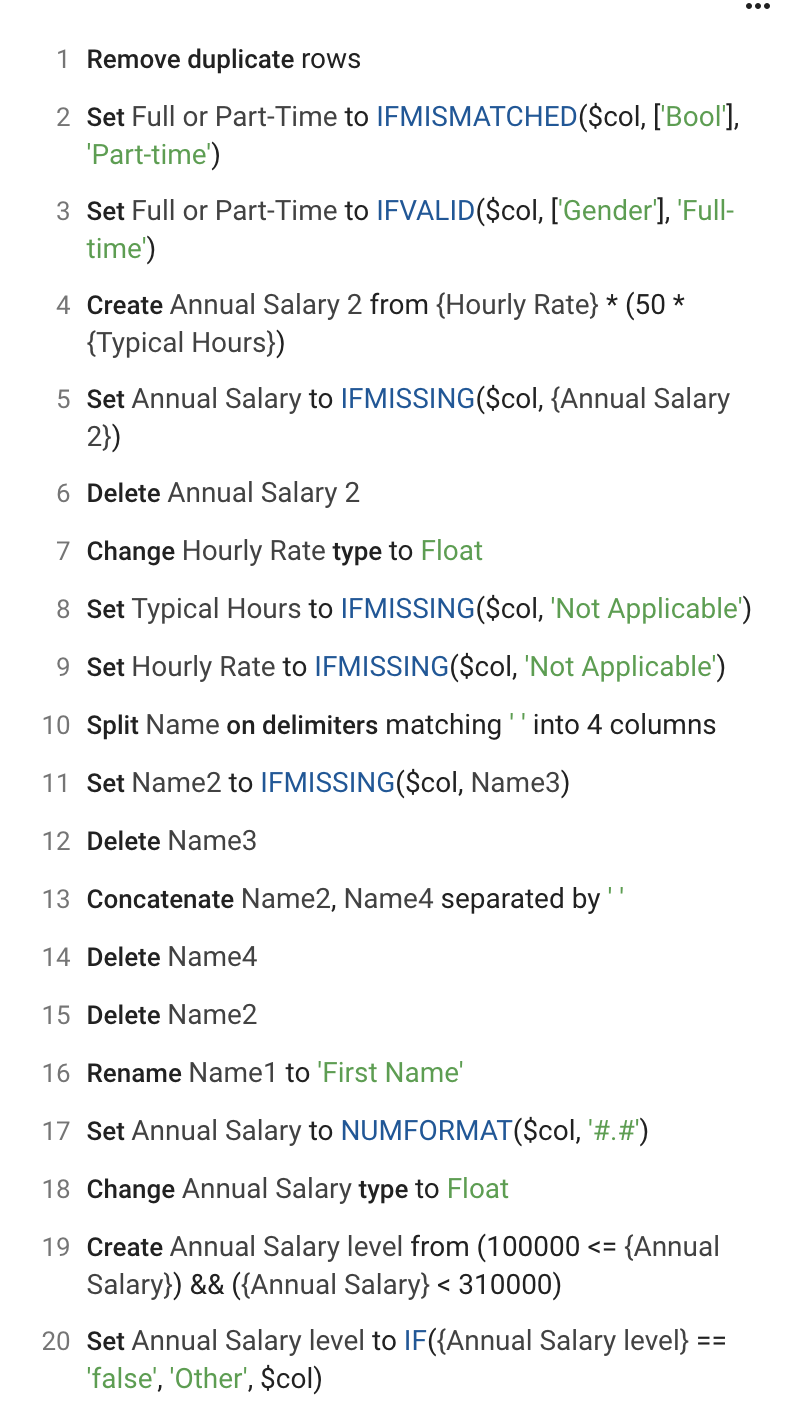

In [7]:
from IPython.display import Image
Image(filename = 'recipe.jpg', width = 400, height = 400)

### Q1.5 - Evaluate

How did it go?  Did your recipe work on the whole dataset?  Did you run into any problems?

**Answer**

In generall, Trifacta is a very convenient and useful tool to wrangle the data.      

__My Process in dealing with the dataset__ 
1. Firstly, once the dataset is imported, it shows the distribution and null values in the data, which enables users to examine what problems the dataset have. By using Trifacta, I splited 'Name' column into 'First Name' and 'Last'. 
2. Then, under the assumption that people works 50 weeks a year, I calculated the annual salaries for 'Hourly' employees which are not available on the original dataset. So that the column 'Annual Salary' has no null value.
3. To make it ready for analysis, replace thoese null values in Column 'Salary or Hourly' and 'Hourly rate' with 'Not Applicable'. 
4. One advantage of Trifacta is that it states the distrbution of variables. So, for the column 'Annual Salary', I defined 'Annual Salary' greater than 100,000 as 'High', and create a new column called 'Annual Salary Level', with distinguish high salaries with others below 100,00.
5. It is also very easy to change data types on Trifacta. However, sometimes it can be recognized incorrectly by default. For example,  the column 'Full or Part-Time' was incorrectly recognized as genda, so that all the value 'P' is recognized as missing value. 

__The function that I did not achieved on Trifacta__ 

As the columns 'Department' only as 38 unique values, I attempted to add a column to state the average annual salary for each department. unfortunately, I did not manage to do this.     

In conlusion, Trifacta is an extreme useful tool to prepare the data. By using it, I make my dataset clean and availabe to be analyzed.

## Part 2 - Summary statistics with Spark

Use Spark to load your data and compute basic summary statistics (counts, or average, min/max, and mean).  You may borrow liberally from the example we saw in class, just change a few things as appropriate.

This is just to get you a taste... we'll do more with Spark next week and in Project 3.

### Q2.1 - Start Spark

First, load up Spark by executing the following cells.  You can just execute them!

In [8]:
import findspark

In [9]:
findspark.init()

In [10]:
from pyspark import SparkContext

In [11]:
spark = SparkContext(appName='exercise-3')

In [12]:
spark

<SparkContext master=local[*] appName=exercise-3>

If it worked, you should see the description of your **SparkContext** and a link (that you can visit by replacing its IP address with your EC2 instance host name).

### Q2.2 - Upload your wrangled data

Upload the data you wrangled with Trifacta in Part 1.  You may use Jupyter's upload function for this, it doesn't need to be captured here.  You may want to compress your data before uploading it.

In a few cells below, ensure that your data uploaded correctly, and uncompress it if necessary.  Count its lines, check its filesize, or look at the first few lines as you deem appropriate until you're confident you have all your data to use here in the notebook.

**Answer**

Ensure the wrangled file exists:

In [14]:
!wget https://s3.amazonaws.com/chicagosalary/Wrangled_Salary.csv

--2018-11-05 14:37:21--  https://s3.amazonaws.com/chicagosalary/Wrangled_Salary.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.106.174
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.106.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3599783 (3.4M) [text/csv]
Saving to: ‘Wrangled_Salary.csv’

Wrangled_Salary.csv 100%[===================>]   3.43M  --.-KB/s    in 0.07s   

2018-11-05 14:37:21 (48.6 MB/s) - ‘Wrangled_Salary.csv’ saved [3599783/3599783]



In [15]:
!ls Wrangled_Salary.csv

Wrangled_Salary.csv


Check the columns and row:
The rows and columns looks appropriate.

In [16]:
!csvcut -n Wrangled_Salary.csv

  1: First Name
  2: Last Name
  3: Job Titles
  4: Department
  5: Full or Part-Time
  6: Salary or Hourly
  7: Typical Hours
  8: Annual Salary
  9: Annual Salary level
 10: Hourly Rate


In [17]:
!wc -l Wrangled_Salary.csv

33183 Wrangled_Salary.csv


In [18]:
!head -n 100 Wrangled_Salary.csv | csvstat

  1. "First Name"

	Type of data:          Text
	Contains null values:  False
	Unique values:         46
	Longest value:         18 characters
	Most common values:    "ARROYO, (33x)
	                       "ARRINGTON, (5x)
	                       "ARNOLD, (4x)
	                       "ARTEAGA, (4x)
	                       "ASKAR, (4x)

  2. "Last Name"

	Type of data:          Text
	Contains null values:  False
	Unique values:         92
	Longest value:         17 characters
	Most common values:    ELIZABETH " (2x)
	                       FRANCISCO " (2x)
	                       NANCY " (2x)
	                       HERIBERTO " (2x)
	                       MIGUEL A" (2x)

  3. "Job Titles"

	Type of data:          Text
	Contains null values:  False
	Unique values:         51
	Longest value:         43 characters
	Most common values:    POLICE OFFICER (31x)
	                       FIREFIGHTER-EMT (5x)
	                       LIEUTENANT-EMT (3x)
	                       MOTOR TRUCK DRIVER 

### Q2.3 - Load your data into a Spark RDD

Load up your data using the techniques we reviewed in class.  Extract the header. Get a count to verify that it's working correctly.

Modify the cells below to get started.

**Answer**

In [19]:
# Edit this cell to point to your file!
data = spark.textFile('Wrangled_Salary.csv')

In [20]:
data.take(5)

['First Name,Last Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Annual Salary level,Hourly Rate',
 '"""ARNOLD,","DIONNE C""",PERSONAL COMPUTER OPERATOR III,PROCUREMENT,Full-time,Salary,Not Applicable,70092,Other,Not Applicable',
 '"""ARNOLD-GHOLSTON,","LEATRICA M""",POLICE COMMUNICATIONS OPERATOR II,OEMC,Full-time,Salary,Not Applicable,81156,Other,Not Applicable',
 '"""ARNOLD,","PATRICK J""",LIEUTENANT-EMT,FIRE,Full-time,Salary,Not Applicable,117996,High,Not Applicable',
 '"""ARNOLD,","PEARLIE """,CROSSING GUARD,OEMC,Part-time,Hourly,20,19380,Other,19.38']

In [21]:
header = data.first()
header

'First Name,Last Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Annual Salary level,Hourly Rate'

In [22]:
data.count()

33184

### Q2.4 - Summarize your data

Choose one of the two techniques we saw in class to compute some basic numbers on one of your columns.  Your options are:

 * Use `map` and `filter` and `reduceByKey` with `lambda` functions find min/max values and to count frequencies in one column
 * Use the `Statistics` module to compute count, mean, min/max (don't forget to import it and numpy)
 
It's your choice.

**Answer**

__I choose the first task__    

__Min and Max values__ : In the wrangled datase, the only numerical column I have is 'Annual Salary', so I find min/max value in the column.

In [23]:
from operator import add

In [24]:
s = data.filter(lambda row: row != header) \
    .map(lambda row: row.split(",")) \
    .map(lambda cols: cols[8]) \
    .takeOrdered(33128)
salary = []
for i in s:
    salary.append(float(i))

_The Maximum annual salary is 300,000_

In [25]:
max(salary)

300000.0

_The Minimum annual salary is 2,650_

In [26]:
min(salary)

2650.0

__Frequencies in the column 'Department'__    
I choose the column 'Department' for this part because it has limited unique values.

In [27]:
department_ = data.filter(lambda row: row != header) \
    .map(lambda row: row.split(",")) \
    .map(lambda cols: (cols[4], 1)) \
    .reduceByKey(add) \
    .takeOrdered(38, key=lambda pair: -pair[1])
for department, count in department_:
    print("{}\t{}".format(count, department))

13389	POLICE
4630	FIRE
2196	STREETS & SAN
2097	OEMC
1875	WATER MGMNT
1629	AVIATION
1139	TRANSPORTN
1013	PUBLIC LIBRARY
980	GENERAL SERVICES
615	FAMILY & SUPPORT
559	FINANCE
487	HEALTH
408	CITY COUNCIL
407	LAW
269	BUILDINGS
207	COMMUNITY DEVELOPMENT
171	BUSINESS AFFAIRS
116	COPA
107	BOARD OF ELECTION
99	DoIT
92	PROCUREMENT
87	INSPECTOR GEN
85	MAYOR'S OFFICE
84	CITY CLERK
81	ANIMAL CONTRL
79	HUMAN RESOURCES
65	CULTURAL AFFAIRS
51	Full-time
46	BUDGET & MGMT
39	ADMIN HEARNG
28	DISABILITIES
22	TREASURER
16	HUMAN RELATIONS
8	BOARD OF ETHICS
4	Part-time
2	POLICE BOARD
1	LICENSE APPL COMM


### Q2.5 - Evaluate

How did it go?  Did it work as you expected?  Did you run into any issues?

What do you like about using Spark?  Or do you dislike it?

**Answer**

Generally, compared with pandas and other tools Sparks runs relatively faster in dealing with data,especially big data.     
However，I went through some difficulties while using Spark. Firstly, I. think it is hard to interrupt, unlike pipe,panda, Spark is not that straight forward. I spent much time understanding reduceByKey and lambda. Moreover, my data looks fine on CSVKit. However, after I load up the data using Spark, the data seems to be modfied. For example, the type of the column 'Annual Salary' should be float,as it showed on CSVKit, it becames Strings after loading. Moreover, one blank column appears.    
Thus, I don't think I like spark that much. However, the reason may be that I am not very familiar in dealing with it, I beleive I can find the charm of Spark later on. 